In [108]:
import time
from math import *
import math
import numpy as np
from scipy import special
import matplotlib.pyplot as plt

In [109]:
data = np.loadtxt('ACH.dat')

In [110]:
Lbox = 1100
hLbox = Lbox/2

Nt = 110000
nbar = Nt / Lbox**3

nk = 9
fbasis = np.zeros(nk)

nr = 21
rmin = 60
rmax = 120
rmid = (rmax+rmin)/2
mu = rmid
sigma = 4.6

In [111]:
sample = np.random.choice(len(data),size=Nt,replace=False)

In [112]:
x, y, z = data[sample].T

In [113]:
t0 = time.time()

Nb = np.zeros(nr)

for i in range(0,Nt-1):
    j = np.arange(i+1,Nt)
    
    dx = x[i] - x[j]
    dy = y[i] - y[j]
    dz = z[i] - z[j]
        
    ### periodic boundary conditions on separations: 
    dxp = dx + Lbox
    dyp = dy + Lbox
    dzp = dz + Lbox
    dxm = dx - Lbox
    dym = dy - Lbox
    dzm = dz - Lbox
    dx[np.where(dx > hLbox)] = dxm[np.where(dx > hLbox)]
    dy[np.where(dy > hLbox)] = dym[np.where(dy > hLbox)]
    dz[np.where(dz > hLbox)] = dzm[np.where(dz > hLbox)]
    dx[np.where(dx < -hLbox)] = dxp[np.where(dx < -hLbox)]
    dy[np.where(dy < -hLbox)] = dyp[np.where(dy < -hLbox)]
    dz[np.where(dz < -hLbox)] = dzp[np.where(dz < -hLbox)]

    r2 = dx**2 + dy**2 + dz**2
    r = np.sqrt(r2)
    
    ### Laguerre pair counts:
    r = r[(r>=rmin) & (r<=rmax)]
    if len(r) > 0:
        s = r/sigma
        E1 = special.erf(s/sqrt(2))
        E2 = sqrt(2/pi)*np.exp(-s**2/2)
        fbasis[0] = fbasis[0] + sum((s+1/s) * E1 + E2)/Nt
        fbasis[1] = fbasis[1] + sum(3 + s**2)/Nt
        fbasis[2] = fbasis[2] + sum((s**3+6*s+3/s) * E1 + (s**2+5) * E2)/Nt
        fbasis[3] = fbasis[3] + sum(s**4+10*s**2+15)/Nt
        fbasis[4] = fbasis[4] + sum((s**5+15*s**3+45*s+15/s) * E1 + (s**2+3)*(s**2+11) * E2)/Nt
        fbasis[5] = fbasis[5] + sum(s**6 + 21*s**4 + 105*s**2 + 105)/Nt
        fbasis[6] = fbasis[6] + sum((s**7+28*s**5+210*s**3+420*s+105/s)*E1 + (s**6+27*s**4+185*s**2+279)*E2)/Nt
        fbasis[7] = fbasis[7] + sum(s**8 + 36*s**6 + 378*s**4 + 1260*s**2 + 945)/Nt
        fbasis[8] = fbasis[8] + sum((s**9+45*s**7+630*s**5+3150*s**3+4725*s+945/s)*E1 + (s**8+44*s**6+588*s**4+2640*s**2+2895)*E2)/Nt
    
        
fbasis = fbasis*2 / (Nt-1)
    

t1 = time.time() 
print('Time =', t1-t0)

Time = 779.8321168422699


In [114]:
dw = 0.001
step = (rmax - rmin)/dw
w = dw*np.arange(60,step)
s = w/sigma
E1 = special.erf(s/sqrt(2))
E2 = sqrt(2/pi)*np.exp(-s**2/2)

dim = (nk, len(s))
f = np.zeros(dim)
f[0,:] = (s+1/s) * E1 + E2
f[1,:] = 3 + s**2
f[2,:] = (s**3+6*s+3/s) * E1 + (s**2+5) * E2
f[3,:] = s**4+10*s**2+15
f[4,:] = (s**5+15*s**3+45*s+15/s) * E1 + (s**2+3)*(s**2+11) * E2
f[5,:] = s**6 + 21*s**4 + 105*s**2 + 105
f[6,:] = (s**7+28*s**5+210*s**3+420*s+105/s)*E1 + (s**6+27*s**4+185*s**2+279)*E2
f[7,:] = s**8 + 36*s**6 + 378*s**4 + 1260*s**2 + 945
f[8,:] = (s**9+45*s**7+630*s**5+3150*s**3+4725*s+945/s)*E1 + (s**8+44*s**6+588*s**4+2640*s**2+2895)*E2
   
    
V = np.zeros(nk)
for k in range(0,nk):
    V[k] = dw*sum(f[k,:]*w[:]**2)
    
nuRR = 4*pi*V[0:nk]/Lbox**3

In [115]:
dim2 = (nk, nk)
FRR = np.zeros(dim2)
for k in range(0,nk):
    for l in range(k,nk):
        FRR[k,l] = sum(f[k,:]*f[l,:]*w[:]**2)*dw*4*pi/Lbox**3
        FRR[l,k] = FRR[k,l]
        
invF = np.linalg.inv(FRR)

In [116]:
nuDD = fbasis
simDiff = nuDD - nuRR
aSim = np.dot(invF, simDiff)
print ('Sim:', aSim)
checkDiff = 0*simDiff
for k in range(0,nk):
    checkDiff[k] = sum(FRR[k,:]*aSim[:])

Sim: [  6.34593148e+09  -9.62945709e+09   5.71570682e+09  -1.77601109e+09
   3.21166322e+08  -3.50169504e+07   2.26757917e+06  -8.02737060e+04
   1.19571937e+03]


In [117]:
rt = np.arange(60,121)
yt = rt/sigma
E1 = special.erf(yt/sqrt(2))
E2 = sqrt(2/pi)*np.exp(-yt**2/2)
xiSim = 0.0*rt
xiSim = xiSim + aSim[0] * ((yt+1/yt) * E1 + E2) \
              + aSim[1] * (3 + yt**2) \
              + aSim[2] * ((yt**3+6*yt+3/yt) * E1 + (yt**2+5) * E2) \
              + aSim[3] * (yt**4+10*yt**2+15) \
                + aSim[4] * ((yt**5+15*yt**3+45*yt+15/yt) * E1 + (yt**2+3)*(yt**2+11) * E2) \
                + aSim[5] * (yt**6 + 21*yt**4 + 105*yt**2 + 105) \
                + aSim[6] * ((yt**7+28*yt**5+210*yt**3+420*yt+105/yt)*E1 + (yt**6+27*yt**4+185*yt**2+279)*E2) \
                + aSim[7] * (yt**8 + 36*yt**6 + 378*yt**4 + 1260*yt**2 + 945) \
                + aSim[8] * ((yt**9+45*yt**7+630*yt**5+3150*yt**3+4725*yt+945/yt)*E1 + (yt**8+44*yt**6+588*yt**4+2640*yt**2+2895)*E2)                    

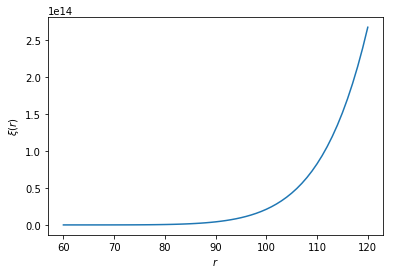

In [125]:
plt.plot(rt,xiSim)
plt.xlabel(r'$r$')
plt.ylabel(r'$\xi(r)$')
plt.show()